# ДОМАШНЯЯ РАБОТА

# Дана статистика пользователей adult.csv.

Получите значения AUC для различных моделей и их параметров.

Решением будет ссылка на гитхаб с ноутбуком.

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from pylab import *
%matplotlib inline
jtplot.style()

from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from catboost import CatBoostRegressor

from sklearn.metrics import auc, roc_curve, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from geopy.distance import geodesic, great_circle
pd.options.display.max_rows = 999
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import io
import requests
import statistics



In [118]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [119]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [121]:
cat_feat_obj = list(data.dtypes[data.dtypes ==object].index)[0:-1]
cat_feat_num = ['educational-num']
cat_feat = cat_feat_obj + cat_feat_num
#отильтруем все непрерывные
num_feat = [f for f in data if f not in (cat_feat + ['fnlwgt', 'income'])]
data_X = data.drop(['income', 'fnlwgt' ], axis=1)

In [122]:
Y = data['income']
X = pd.get_dummies(data_X, columns=cat_feat)

In [123]:
X.shape, Y.shape

((48842, 122), (48842,))

In [124]:
#stack_cv = KFold(n_splits=10, random_state=None, shuffle=False)
data.loc[data['income'] == '<=50K','income'] = 0
data.loc[data['income'] == '>50K','income'] = 1

In [125]:
Y = data['income']
model_ml = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model_ml.fit(X_train, Y_train)
predictions = model_ml.predict_proba(X_test)
model_ml.score(X_test, Y_test)

/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.850815532655429

In [126]:
roc_auc_score( Y_test, predictions[:, 1])

0.9027762785609325

In [127]:
Y_test

38113    0
39214    1
44248    1
10283    0
26724    0
        ..
48826    1
44230    0
27824    0
13582    0
14557    0
Name: income, Length: 14653, dtype: int64

In [128]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [129]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.24784938654632632, 1.0, 0.0025102918452389778)
(0.24779634722516042, 0.9997155049786629, 0.002511814019961867)
(0.2478138222849083, 0.9997155049786629, 0.002512152721083103)
(0.24783129980957755, 0.9997155049786629, 0.0025130236505116537)
(0.24786626225576638, 0.9997155049786629, 0.002513147994922378)
(0.24788374717832956, 0.9997155049786629, 0.0025155392526651573)
(0.24790123456790122, 0.9997155049786629, 0.0025187443341214235)
(0.24791872442500354, 0.9997155049786629, 0.0025245180740912877)
(0.24793621675015876, 0.9997155049786629, 0.0025253441228015477)
(0.24795371154388937, 0.9997155049786629, 0.0025306465707884)
(0.24798870853916727, 0.9997155049786629, 0.0025380573957233666)
(0.24800621074176019, 0.9997155049786629, 0.0025491022894208537)
(0.24802371541501977, 0.9997155049786629, 0.0025653694637685375)
(0.2480412225594692, 0.9997155049786629, 0.002570568169568989)
(0.2480587321756318, 0.9997155049786629, 0.0025731174447021043)
(0.24807624426403108, 0.9997155049786629, 0.002586

(0.28084766093562574, 0.9991465149359886, 0.008828220138459271)
(0.28087012156110047, 0.9991465149359886, 0.008829229180629108)
(0.28089258577941295, 0.9991465149359886, 0.008830257073144153)
(0.2809150535914254, 0.9991465149359886, 0.008830265274333737)
(0.2809375249980002, 0.9991465149359886, 0.008831123552212413)
(0.28096, 0.9991465149359886, 0.008831667244947813)
(0.28098247859828784, 0.9991465149359886, 0.008832494813641288)
(0.281004960793727, 0.9991465149359886, 0.008846852723965076)
(0.28102744658718093, 0.9991465149359886, 0.008852484227346705)
(0.28104993597951344, 0.9991465149359886, 0.008863136409191431)
(0.28107242897158863, 0.9991465149359886, 0.008889553704096295)
(0.28109492556427085, 0.9991465149359886, 0.008890743197305043)
(0.28111742575842474, 0.9991465149359886, 0.008899674890130794)
(0.2811399295549151, 0.9991465149359886, 0.008901050650266997)
(0.2811624369546073, 0.9991465149359886, 0.008903162220797553)
(0.2811849479583667, 0.9991465149359886, 0.008905047526470

(0.3063007952460019, 0.9971550497866287, 0.01556023026354259)
(0.30632756511099457, 0.9971550497866287, 0.015563708698675467)
(0.30635433965562453, 0.9971550497866287, 0.015565377209618574)
(0.3063811188811189, 0.9971550497866287, 0.015576759795367656)
(0.30640790278870533, 0.9971550497866287, 0.015594432228766157)
(0.3064346913796118, 0.9971550497866287, 0.015602249357663923)
(0.3064614846550669, 0.9971550497866287, 0.015605937662445762)
(0.3064882826162994, 0.9971550497866287, 0.015614403120852141)
(0.3065150852645387, 0.9971550497866287, 0.015621209793645252)
(0.3065418926010145, 0.9971550497866287, 0.015621482378779255)
(0.30656870462695707, 0.9971550497866287, 0.015633063813188654)
(0.30664916885389326, 0.9971550497866287, 0.01563565189355272)
(0.30667599965001313, 0.9971550497866287, 0.015639197638419686)
(0.3067028351417571, 0.9971550497866287, 0.015650479503490727)
(0.30672967533035794, 0.9971550497866287, 0.01565392569627088)
(0.30675652021704886, 0.9971550497866287, 0.0156567

(0.3514005460612802, 0.9886201991465149, 0.03243840911052272)
(0.3514360841423948, 0.9886201991465149, 0.032464643631980816)
(0.35147162941235965, 0.9886201991465149, 0.03246730756292339)
(0.3515071818733563, 0.9886201991465149, 0.0325556863313264)
(0.35154274152756704, 0.9886201991465149, 0.03259033450475397)
(0.35157830837717524, 0.9886201991465149, 0.032604453127829953)
(0.3516138824243651, 0.9886201991465149, 0.03264226498901324)
(0.3516494636713216, 0.9886201991465149, 0.032647019711144844)
(0.35168505212023077, 0.9886201991465149, 0.032683396960261235)
(0.3517206477732793, 0.9886201991465149, 0.03269553825497979)
(0.35175625063265514, 0.9886201991465149, 0.03269959163786907)
(0.3517918607005467, 0.9886201991465149, 0.03275883222372484)
(0.3518274779791435, 0.9886201991465149, 0.03276273245142153)
(0.3518631024706359, 0.9886201991465149, 0.03282860579970044)
(0.3518987341772152, 0.9886201991465149, 0.03287512557629337)
(0.3519343731010735, 0.9886201991465149, 0.03288652618528186)


(0.3738923708666523, 0.984352773826458, 0.044455946522897596)
(0.3739327785583054, 0.984352773826458, 0.0444580668472727)
(0.37397319498486814, 0.984352773826458, 0.044475434792204276)
(0.37401362014917305, 0.984352773826458, 0.04448522254258613)
(0.37394594594594593, 0.9840682788051209, 0.04449334156042842)
(0.37398637690561143, 0.9840682788051209, 0.044505245817491934)
(0.37402681660899656, 0.9840682788051209, 0.044526269902719004)
(0.37395912187736563, 0.9837837837837838, 0.044578686927693116)
(0.37399956738048884, 0.9837837837837838, 0.044594047344887894)
(0.3740400216333153, 0.9837837837837838, 0.04460743878078756)
(0.37408048463868454, 0.9837837837837838, 0.04460764253842686)
(0.37412095639943743, 0.9837837837837838, 0.04462094984759197)
(0.37424242424242427, 0.9837837837837838, 0.04464862213315859)
(0.37428293105314425, 0.9837837837837838, 0.04464863161242628)
(0.37432344663347045, 0.9837837837837838, 0.044692824599343976)
(0.37436397098625096, 0.9837837837837838, 0.044693565239

(0.4123400144892538, 0.9715504978662873, 0.06993542814523701)
(0.41231884057971013, 0.9712660028449502, 0.07002123159373572)
(0.412368643555985, 0.9712660028449502, 0.07004591943436592)
(0.41241845856487075, 0.9712660028449502, 0.07007222090280515)
(0.4124682856107285, 0.9712660028449502, 0.0701978399360062)
(0.4125181246979217, 0.9712660028449502, 0.07024447094570155)
(0.4125679758308157, 0.9712660028449502, 0.07026990755881649)
(0.4126178390137781, 0.9712660028449502, 0.07028876853624164)
(0.41266771425117854, 0.9712660028449502, 0.07032876296702016)
(0.4127176015473888, 0.9712660028449502, 0.07033945790389724)
(0.4127675009067827, 0.9712660028449502, 0.07034810667894895)
(0.4128174123337364, 0.9712660028449502, 0.07036470878884225)
(0.4128673358326279, 0.9712660028449502, 0.07043804347682295)
(0.41291727140783746, 0.9712660028449502, 0.07049893013118963)
(0.41296721906374745, 0.9712660028449502, 0.07054484655989822)
(0.4130171788047423, 0.9712660028449502, 0.07058280059749912)
(0.41

(0.45575891014173664, 0.9422475106685633, 0.11452047995873604)
(0.4558216350123865, 0.9422475106685633, 0.11459024658391659)
(0.45588437715072266, 0.9422475106685633, 0.11463074138216439)
(0.45594713656387664, 0.9422475106685633, 0.11465424051997432)
(0.4560099132589839, 0.9422475106685633, 0.11468593566524907)
(0.4560727072431837, 0.9422475106685633, 0.1146940190857396)
(0.45613551852361933, 0.9422475106685633, 0.11471987024469633)
(0.456198347107438, 0.9422475106685633, 0.11476838683547712)
(0.45626119300179085, 0.9422475106685633, 0.11478296338382264)
(0.456324056213833, 0.9422475106685633, 0.11492594073567641)
(0.45638693675072345, 0.9422475106685633, 0.11494140934715844)
(0.4564498346196251, 0.9422475106685633, 0.11494817354460099)
(0.4566386322900869, 0.9422475106685633, 0.1150085307641064)
(0.4567015995587424, 0.9422475106685633, 0.11501413368219195)
(0.45676458419528343, 0.9422475106685633, 0.11507208162857364)
(0.45682758620689656, 0.9422475106685633, 0.11512647577121737)
(0.4

(0.5095253471101066, 0.8978662873399715, 0.1715737603681781)
(0.5096076215081544, 0.8978662873399715, 0.17163365685552828)
(0.5095284237726099, 0.8975817923186344, 0.17166898449004045)
(0.5094492004522694, 0.8972972972972973, 0.17187605850796728)
(0.5095315024232633, 0.8972972972972973, 0.17191784183551487)
(0.509613830990467, 0.8972972972972973, 0.17192436861366625)
(0.5096961861667744, 0.8972972972972973, 0.17233737360439255)
(0.5097785679650881, 0.8972972972972973, 0.172365097459994)
(0.5098609763983187, 0.8972972972972973, 0.17248161866455014)
(0.5099434114793856, 0.8972972972972973, 0.17258002864070449)
(0.5100258732212161, 0.8972972972972973, 0.17275876084426486)
(0.5101083616367459, 0.8972972972972973, 0.1728969406716922)
(0.5101908767389195, 0.8972972972972973, 0.17293611244222143)
(0.5101116324219382, 0.8970128022759601, 0.1729413653873395)
(0.5101941747572816, 0.8970128022759601, 0.1730005884539521)
(0.5102767438096779, 0.8970128022759601, 0.17313119873507699)
(0.510359339592

(0.6117249154453213, 0.7718349928876245, 0.303624980302216)
(0.6122771383434891, 0.7718349928876245, 0.3036967413092798)
(0.6124153498871332, 0.7718349928876245, 0.30375818341901456)
(0.6123278392413637, 0.7715504978662874, 0.3039574407070568)
(0.6122402890695574, 0.7712660028449502, 0.3040322966247993)
(0.6121526993449289, 0.7709815078236131, 0.30403450341730687)
(0.6122910076818798, 0.7709815078236131, 0.3040449994831114)
(0.6124293785310735, 0.7709815078236131, 0.3040641938061202)
(0.6125678119349005, 0.7709815078236131, 0.3041389357116824)
(0.612480217047253, 0.770697012802276, 0.30417096284243866)
(0.6123925825418363, 0.7704125177809389, 0.30418847974235713)
(0.6125311015607329, 0.7704125177809389, 0.3042244767244179)
(0.6126696832579186, 0.7704125177809389, 0.3043355583630868)
(0.6128083276759447, 0.7704125177809389, 0.3048277107197936)
(0.6127206880941602, 0.7701280227596017, 0.30485341147187356)
(0.6128594068372198, 0.7701280227596017, 0.30495689055415903)
(0.6127717391304348, 

(0.7334258937868795, 0.6011379800853485, 0.48196511786697416)
(0.7333333333333333, 0.6008534850640114, 0.4819816106495695)
(0.7335880514067384, 0.6008534850640114, 0.48219744743901305)
(0.7338429464906184, 0.6008534850640114, 0.48223917472555927)
(0.7337504344803615, 0.6005689900426743, 0.48227529608315356)
(0.7340055632823366, 0.6005689900426743, 0.4824353622187148)
(0.7342608695652174, 0.6005689900426743, 0.4829818053873138)
(0.7341684064022269, 0.6002844950213371, 0.48306243877377625)
(0.7344239470936303, 0.6002844950213371, 0.483179615013583)
(0.7343314763231198, 0.6, 0.4834454260866143)
(0.7342389411354928, 0.5997155049786629, 0.4835036719718225)
(0.7344947735191638, 0.5997155049786629, 0.4836639060703107)
(0.734402230742419, 0.5994310099573258, 0.4836859238275892)
(0.7343096234309623, 0.5991465149359886, 0.48394062019180123)
(0.7344731332868109, 0.5988620199146515, 0.48416770184922936)
(0.7347294938917975, 0.5988620199146515, 0.484507258827252)
(0.7346368715083799, 0.598577524893

(0.8213507625272332, 0.42901849217638693, 0.6476894213154165)
(0.8212534059945504, 0.4287339971550498, 0.647784999279256)
(0.8211559432933478, 0.42844950213371263, 0.6479101664732914)
(0.8210583742498636, 0.42816500711237554, 0.6480820188507954)
(0.8215065502183406, 0.42816500711237554, 0.6483848887538265)
(0.821409066084107, 0.4278805120910384, 0.6484376002565274)
(0.8213114754098361, 0.4275960170697013, 0.6484443557690105)
(0.8217605248769819, 0.4275960170697013, 0.6484456436460626)
(0.8215654077723044, 0.42702702702702705, 0.6486006837209404)
(0.8220153340635268, 0.42702702702702705, 0.6488510041081414)
(0.821917808219178, 0.4267425320056899, 0.6489233652653711)
(0.8223684210526315, 0.4267425320056899, 0.6492917142166571)
(0.8228195282501372, 0.4267425320056899, 0.6493750213397438)
(0.822722283205269, 0.42645803698435275, 0.6496261875909135)
(0.8231740801757276, 0.42645803698435275, 0.6498371916599429)
(0.823076923076923, 0.42617354196301566, 0.650137653371948)
(0.822979659153381, 0

(0.9514866979655712, 0.17297297297297298, 0.8771940552324102)
(0.95141065830721, 0.17268847795163583, 0.8772597845490555)
(0.9513343799058085, 0.1724039829302987, 0.8775975609072904)
(0.9512578616352201, 0.1721194879089616, 0.8782884605765197)
(0.9511811023622048, 0.17183499288762447, 0.8784610830893474)
(0.9511041009463722, 0.17155049786628734, 0.8786439430345843)
(0.9510268562401264, 0.17126600284495022, 0.8792644297299351)
(0.9509493670886076, 0.1709815078236131, 0.8794735805518428)
(0.9508716323296355, 0.17069701280227595, 0.8797912957158682)
(0.9507936507936507, 0.17041251778093883, 0.8800196283999073)
(0.9523052464228935, 0.17041251778093883, 0.8807454778582041)
(0.9522292993630573, 0.1701280227596017, 0.880944201081658)
(0.9521531100478469, 0.16984352773826458, 0.8810898706109233)
(0.9536741214057508, 0.16984352773826458, 0.8822575893753668)
(0.9536, 0.16955903271692746, 0.8824479289863266)
(0.9535256410256411, 0.16927453769559034, 0.8827825188410336)
(0.9534510433386838, 0.1689

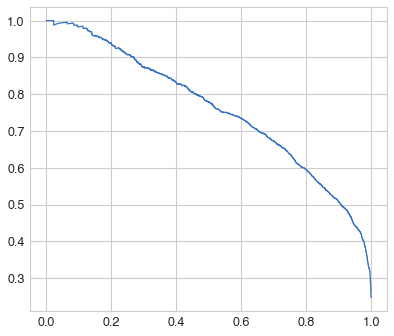

In [130]:
plt.plot( re, pr )

In [132]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.7600718017829521

In [133]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [135]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9999999999999978)
(0.0, 0.0002844950213371266, 0.9999999999999978)
(0.0, 0.0011379800853485065, 0.9999999999999967)
(0.0, 0.0017069701280227596, 0.9999999999999949)
(0.0, 0.0034139402560455193, 0.9999999999999933)
(0.0, 0.003982930298719772, 0.9999999999999929)
(0.0, 0.005405405405405406, 0.9999999999999916)
(0.0, 0.006258890469416785, 0.9999999999999911)
(0.0, 0.006543385490753912, 0.9999999999999907)
(0.0, 0.007396870554765292, 0.99999999999999)
(0.0, 0.008250355618776671, 0.9999999999999885)
(0.0, 0.008819345661450925, 0.9999999999999878)
(0.0, 0.009103840682788052, 0.9999999999999871)
(0.0, 0.009672830725462305, 0.9999999999999867)
(0.0, 0.022475106685633, 0.999999999997587)
(8.97827258035554e-05, 0.022475106685633, 0.9999154149406888)
(8.97827258035554e-05, 0.044096728307254626, 0.9970415912952945)
(8.97827258035554e-05, 0.04466571834992888, 0.9970213093566244)
(8.97827258035554e-05, 0.059743954480796585, 0.9948383921612448)
(8.97827258035554e-05, 0.060312944523470836

(0.08870533309391274, 0.654054054054054, 0.4284736652220149)
(0.08870533309391274, 0.6546230440967283, 0.42800831681619317)
(0.0889746812713234, 0.6546230440967283, 0.4277413796834323)
(0.08924402944873407, 0.6546230440967283, 0.4277129987403104)
(0.08924402944873407, 0.6549075391180654, 0.4276708359887768)
(0.08933381217453762, 0.6551920341394025, 0.42763658103516106)
(0.08933381217453762, 0.6554765291607397, 0.42760165892218305)
(0.0897827258035554, 0.6554765291607397, 0.4270112755874313)
(0.0897827258035554, 0.6566145092460882, 0.4266047743909383)
(0.08987250852935895, 0.6566145092460882, 0.42651260809878766)
(0.08987250852935895, 0.6568990042674253, 0.42642954002426364)
(0.09005207398096607, 0.6568990042674253, 0.42640124046764244)
(0.09005207398096607, 0.6571834992887624, 0.42638691455132527)
(0.09041120488418028, 0.6571834992887624, 0.4260200047174184)
(0.09041120488418028, 0.6577524893314367, 0.4260000546921277)
(0.0905907703357874, 0.6577524893314367, 0.42551414043841024)
(0.09

(0.2284970371700485, 0.8588904694167852, 0.21481354917727863)
(0.22894595079906627, 0.8588904694167852, 0.21436542705179723)
(0.22912551625067337, 0.8588904694167852, 0.21435683974112416)
(0.22912551625067337, 0.8591749644381224, 0.21427301375776853)
(0.22948464715388758, 0.8591749644381224, 0.21402486171994337)
(0.23011312623451247, 0.8591749644381224, 0.21396777832639174)
(0.2304722571377267, 0.8591749644381224, 0.21337660816547485)
(0.2304722571377267, 0.8594594594594595, 0.21334335983116903)
(0.23056203986353024, 0.8594594594594595, 0.21326247695684364)
(0.23056203986353024, 0.8597439544807965, 0.21324667218073812)
(0.2306518225893338, 0.8597439544807965, 0.21323494110534985)
(0.2306518225893338, 0.8603129445234708, 0.21317075861747953)
(0.2311007362183516, 0.8603129445234708, 0.21274750719048577)
(0.2311007362183516, 0.8608819345661451, 0.2125526696059161)
(0.23163943257317293, 0.8608819345661451, 0.21210992526910943)
(0.23181899802478004, 0.8608819345661451, 0.2119381622872115)
(

(0.9599569042916143, 1.0, 0.0024003988409451106)
(0.9630095169689352, 1.0, 0.0022440610357567815)
(0.9631890824205422, 1.0, 0.002238611787803744)
(0.9633686478721494, 1.0, 0.002227063755271553)
(0.9635482133237565, 1.0, 0.0022156061741256425)
(0.9647153887592027, 1.0, 0.0021068997112464504)
(0.9648949542108098, 1.0, 0.0021004746989752307)
(0.9652540851140241, 1.0, 0.0020763587933414667)
(0.9655234332914348, 1.0, 0.0020597321938807733)
(0.9656132160172383, 1.0, 0.002056732049978486)
(0.9657927814688454, 1.0, 0.002054115841370377)
(0.9662416950978632, 1.0, 0.002044210451227791)
(0.9664212605494703, 1.0, 0.002041612846011624)
(0.9665110432752738, 1.0, 0.0020358044696155227)
(0.9667803914526845, 1.0, 0.002033451012930666)
(0.9671395223558987, 1.0, 0.0020130953429352933)
(0.9673190878075059, 1.0, 0.00201003056434169)
(0.9684862632429521, 1.0, 0.001963061483785435)
(0.9686658286945592, 1.0, 0.0019553245578361354)
(0.9696534386783983, 1.0, 0.001897293268950123)
(0.9698330041300054, 1.0, 0.001

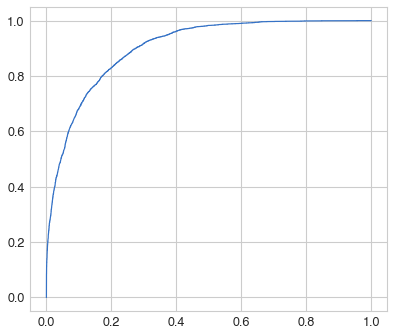

In [136]:
plt.plot( fpr, tpr )

/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


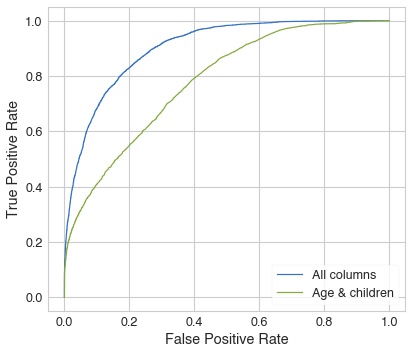

In [142]:
Xshort = data[num_feat]
Xshort.head()
model2 = LogisticRegression()
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )
model2.fit( X_train_short, Y_train )
predictions2 = model2.predict_proba( X_test_short )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

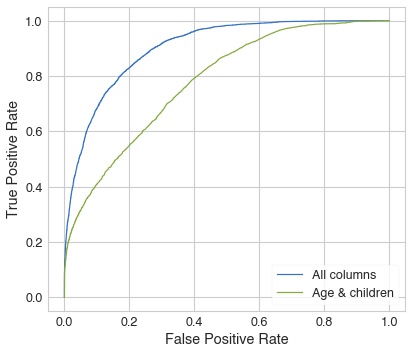

In [147]:
#**Посчитаем площадь под ROC-кривой для двух моделей**
roc_auc_score( Y_test, predictions[:, 1] ), auc( fpr, tpr )

(0.9027762785609325, 0.9027762785609325)

In [148]:
roc_auc_score( Y_test, predictions2[:, 1] ), auc( fpr2, tpr2 )

(0.7800244035323565, 0.7800244035323565)

/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


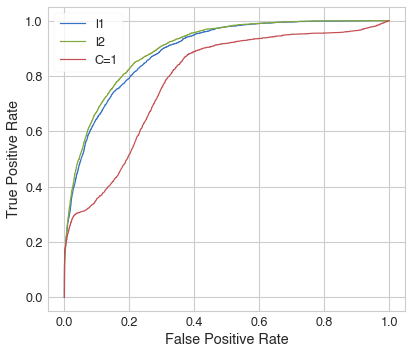

In [150]:
#L1 и L2-регуляризация

model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()


In [151]:
#еще одна модель по другим признакам
Xshort = pd.get_dummies( data[cat_feat], columns = cat_feat )
Xshort.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,educational-num_7,educational-num_8,educational-num_9,educational-num_10,educational-num_11,educational-num_12,educational-num_13,educational-num_14,educational-num_15,educational-num_16
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


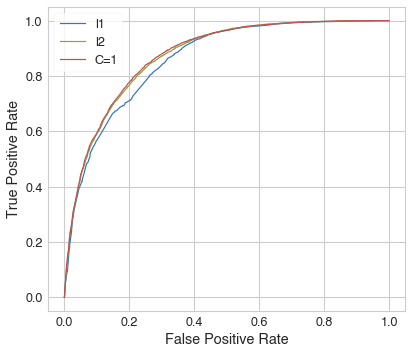

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()